In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

In [2]:
EXTRACTED_FEATURES_DB_NAME = '/data/experiments/YHE/extracted-features/extracted-features.sqlite'

In [3]:
db_conn = sqlite3.connect(EXTRACTED_FEATURES_DB_NAME)
sequences_df = pd.read_sql_query("select * from features", db_conn)
db_conn.close()

In [4]:
sequences_df[['sequence','charge','run_name','number_of_runs_extracted','human','group','classed_as']].sample(n=5)

,sequence,charge,run_name,number_of_runs_extracted,human,group,classed_as
721648,YLDGMDSDFTSMTSLLTGSVK,2,YHE211_04_Slot1-1_1_3000,21,1,YHE211,target
430459,QDLPNAMNAAEITDK,2,YHE114_11_Slot1-1_1_3043,31,1,YHE114,target
270899,LFCDIAGMLLK,2,YHE010_11_Slot1-1_1_3041,30,1,YHE010,decoy
665263,QLGEWAGLGK,2,YHE114_03_Slot1-1_1_3010,6,0,YHE114,target
120588,EMSGDLEEGMLAVVK,2,YHE114_10_Slot1-1_1_3017,31,1,YHE114,target


In [5]:
sequences_df['group'] = sequences_df.run_name.apply(lambda x: x.split('_')[0])

In [6]:
sequences_df[['sequence','charge','run_name','number_of_runs_extracted','human','group']].sample(n=5)

,sequence,charge,run_name,number_of_runs_extracted,human,group
130338,M[15.9949]LLDSEQHPCQLK,2,YHE114_10_Slot1-1_1_3017,29,1,YHE114
224305,ILGTSPDMIDSAENR,2,YHE010_05_Slot1-1_1_2990,29,0,YHE010
700101,AQVPFEQILSLPELK,2,YHE211_04_Slot1-1_1_3000,28,1,YHE211
430922,QNGAGPLSGQPPNQDHK,2,YHE114_11_Slot1-1_1_3043,31,1,YHE114
21752,TTYYVVGSAIGPHPYPTLVR,2,YHE114_02_Slot1-1_1_3009,21,0,YHE114


In [7]:
yhe_only_df = sequences_df[(sequences_df.group == 'YHE211') | (sequences_df.group == 'YHE114')]
yhe_only_targets_df = yhe_only_df[(yhe_only_df.classed_as == 'target')]

In [8]:
number_of_yhe_runs_in_experiment = len(yhe_only_df.file_idx.unique())
print('there are {} runs in the experiment'.format(number_of_yhe_runs_in_experiment))

there are 21 runs in the experiment


#### analyse the rate of successful extractions of peptides in the library

In [36]:
# count how many runs each sequence/charge was extracted from
sequence_occurences_l = []
for group_name,group_df in yhe_only_df.groupby(['sequence','charge'], as_index=False):
    sequence_occurences_l.append((group_name[0], group_name[1], len(group_df.file_idx.unique())))
yhe_sequence_occurences_df = pd.DataFrame(sequence_occurences_l, columns=['sequence','charge','number_of_runs_extracted'])

In [42]:
# display the number of missing extractions across the experiment
yhe_sequence_occurences_df['missing_files'] = number_of_yhe_runs_in_experiment - yhe_sequence_occurences_df.number_of_runs_extracted
proportion_of_missing_extractions = yhe_sequence_occurences_df.missing_files.sum() / (len(yhe_sequence_occurences_df) * number_of_yhe_runs_in_experiment)
print("{}% of extractions missing across the experiment.".format(round(proportion_of_missing_extractions*100)))

17.0% of extractions missing across the experiment.


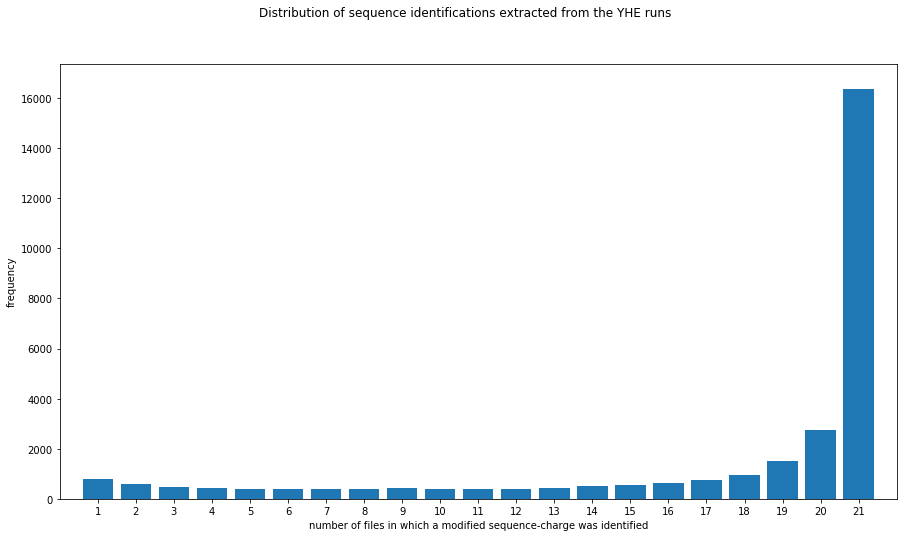

In [41]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Distribution of sequence identifications extracted from the YHE runs')
# plt.title('total {} modified peptide sequences'.format(modified_sequences_count))

counts = np.bincount(yhe_sequence_occurences_df.number_of_runs_extracted)
ax1.bar(range(22), counts, width=0.8, align='center')
plt.xlabel('number of files in which a modified sequence-charge was extracted')
plt.ylabel('frequency')
ax1.set(xticks=range(1,22), xlim=[0, 22])
# plt.ylim((0,20000))

plt.show()

In [9]:
# count how many runs each sequence/charge was extracted from and classified as a target
sequence_occurences_l = []
for group_name,group_df in yhe_only_targets_df.groupby(['sequence','charge'], as_index=False):
    sequence_occurences_l.append((group_name, len(group_df), group_name[0], group_name[1]))
yhe_sequence_occurences_df = pd.DataFrame(sequence_occurences_l, columns=['sequence_charge','number_of_runs_targets_extracted','sequence','charge'])

In [27]:
# display the number of missing values across the experiment
yhe_sequence_occurences_df['missing_files'] = number_of_yhe_runs_in_experiment - yhe_sequence_occurences_df.number_of_runs_targets_extracted
proportion_of_missing_values = yhe_sequence_occurences_df.missing_files.sum() / (len(yhe_sequence_occurences_df) * number_of_yhe_runs_in_experiment)
print("{}% of values are missing across the experiment.".format(round(proportion_of_missing_values*100)))

28.0% of values are missing across the experiment.


In [11]:
yhe_sequence_occurences_df.sample(n=10)[['sequence','charge','number_of_runs_targets_extracted','missing_files']]

,sequence,charge,number_of_runs_targets_extracted,missing_files
17401,NTVLCNVVEQFLQADLAR,2,20,1
21809,TEAASDPQHPAASEGAAAAAASPPLLR,3,2,19
7835,GAEISEENSEGGLHVDLAQIIEACDVCLK,3,20,1
15605,MIAPM[15.9949]IEKFSEQYPQADFYK,2,15,6
5322,EIAVGDSEGQIVIYDVGEQIAVPR,2,21,0
23501,VCEEIAIIPSK,2,1,20
4213,DVALLVTSGLALAR,2,12,9
19646,RTPALIALR,2,1,20
9135,GSSGVGLTAAVTTDQETGER,2,21,0
12474,LAQQNAVTSLSEECK,2,20,1


In [12]:
df = yhe_only_df[(yhe_only_df.sequence == 'EHHIDPTAITR') & (yhe_only_df.charge == 2)][['sequence','charge','file_idx','classed_as','prob_target']]
df

,sequence,charge,file_idx,classed_as,prob_target
4989,EHHIDPTAITR,2,16,target,0.769184
30081,EHHIDPTAITR,2,28,target,0.949875
75195,EHHIDPTAITR,2,23,decoy,0.004988
145215,EHHIDPTAITR,2,9,target,0.987639
170275,EHHIDPTAITR,2,25,decoy,0.230228
195448,EHHIDPTAITR,2,24,target,0.996354
241602,EHHIDPTAITR,2,27,target,0.961668
285211,EHHIDPTAITR,2,20,decoy,0.192898
309215,EHHIDPTAITR,2,29,decoy,0.091118
394380,EHHIDPTAITR,2,14,target,0.550377


In [32]:
len(yhe_only_df[yhe_only_df.classed_as == 'decoy']) / len(yhe_only_df[yhe_only_df.classed_as == 'target'])

0.29285393526041964

In [13]:
len(df)

20

In [14]:
modified_sequences_count = len(yhe_sequence_occurences_df)
modified_sequences_count

26695

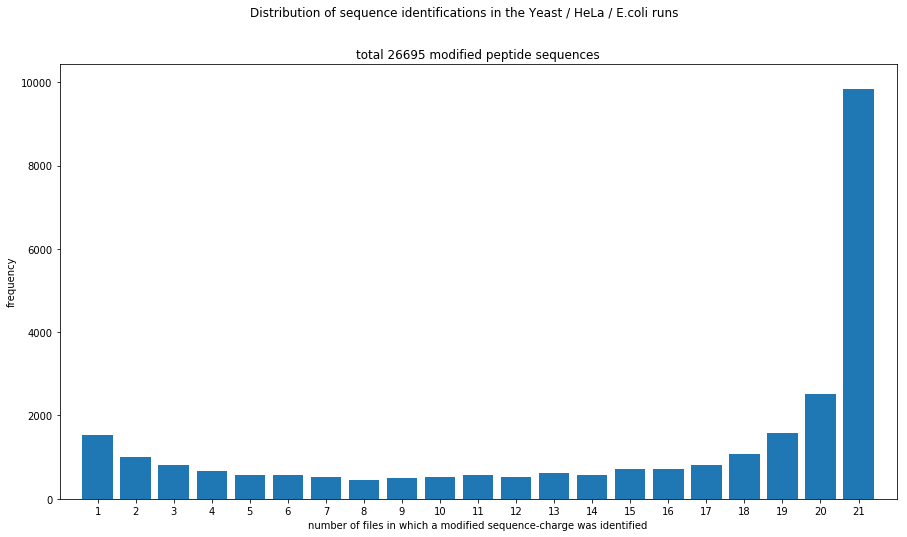

In [15]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Distribution of sequence identifications in the Yeast / HeLa / E.coli runs')
plt.title('total {} modified peptide sequences'.format(modified_sequences_count))

counts = np.bincount(yhe_sequence_occurences_df.number_of_runs_targets_extracted)
ax1.bar(range(22), counts, width=0.8, align='center')
plt.xlabel('number of files in which a modified sequence-charge was identified')
plt.ylabel('frequency')
ax1.set(xticks=range(1,22), xlim=[0, 22])
# plt.ylim((0,20000))

plt.show()

#### now analyse the human-only runs

In [16]:
human_only_df = sequences_df[(sequences_df.group == 'YHE010')]
human_only_targets_df = human_only_df[(human_only_df.classed_as == 'target')]

In [17]:
# count how many runs each sequence/charge was extracted from
sequence_occurences_l = []
for group_name,group_df in human_only_targets_df.groupby(['sequence','charge'], as_index=False):
    sequence_occurences_l.append((group_name, len(group_df), group_name[0], group_name[1], group_df.iloc[0].human))
human_sequence_occurences_df = pd.DataFrame(sequence_occurences_l, columns=['sequence_charge','number_of_runs_targets_extracted','sequence','charge','human'])


In [18]:
# proportion of false positives i.e. non-human peptides found in the human-only runs
print('false positives: {}%'.format(round(len(human_sequence_occurences_df[(human_sequence_occurences_df.human == 0)]) / len(human_sequence_occurences_df) * 100.0, 1)))

false positives: 9.0%


In [19]:
number_of_human_runs_in_experiment = len(human_only_df.file_idx.unique())
print('there are {} human-only runs in the experiment'.format(number_of_human_runs_in_experiment))

there are 10 human-only runs in the experiment


In [28]:
# display the number of missing values across the experiment
human_sequence_occurences_df['missing_files'] = number_of_human_runs_in_experiment - human_sequence_occurences_df.number_of_runs_targets_extracted
proportion_of_missing_values = human_sequence_occurences_df.missing_files.sum() / (len(human_sequence_occurences_df) * number_of_human_runs_in_experiment)
print("{}% of values are missing across the experiment.".format(round(proportion_of_missing_values*100)))

30.0% of values are missing across the experiment.


In [21]:
human_sequence_occurences_df.sample(n=10)[['sequence','charge','number_of_runs_targets_extracted','missing_files']]

,sequence,charge,number_of_runs_targets_extracted,missing_files
11983,LWSLDSDEPVADIEGHTVR,3,8,2
20824,YPYVCHAELNAIMNK,3,3,7
13706,NVFLLGFIPAK,2,10,0
5656,FLSPQDTFEALK,2,10,0
12961,NELHNLLDKPQLQGIPVLVLGNK,3,10,0
12401,MLVIEQCK,2,1,9
6607,GGTTSWGTSGQPSPSYDSSR,2,5,5
8433,IEFVVVGPEAPLAAGIVGNLR,2,9,1
18641,VEELEEHVSHLTEK,2,10,0
5828,FQENYVAQLILDVR,2,10,0


In [22]:
df = human_only_df[(human_only_df.sequence == 'APVAIGVAAMSTAEMLTSGLK') & (human_only_df.charge == 2)][['sequence','charge','file_idx','classed_as','prob_target']]
df

,sequence,charge,file_idx,classed_as,prob_target
50967,APVAIGVAAMSTAEMLTSGLK,2,4,target,0.998877
216599,APVAIGVAAMSTAEMLTSGLK,2,1,decoy,0.215683
328981,APVAIGVAAMSTAEMLTSGLK,2,12,target,0.646673
350284,APVAIGVAAMSTAEMLTSGLK,2,3,target,0.563356
370485,APVAIGVAAMSTAEMLTSGLK,2,2,decoy,0.033295
464829,APVAIGVAAMSTAEMLTSGLK,2,5,decoy,0.188320
508429,APVAIGVAAMSTAEMLTSGLK,2,19,target,0.999673
578727,APVAIGVAAMSTAEMLTSGLK,2,7,target,0.999144


In [23]:
len(df)

8

In [24]:
modified_sequences_count = len(human_sequence_occurences_df)
modified_sequences_count

21061

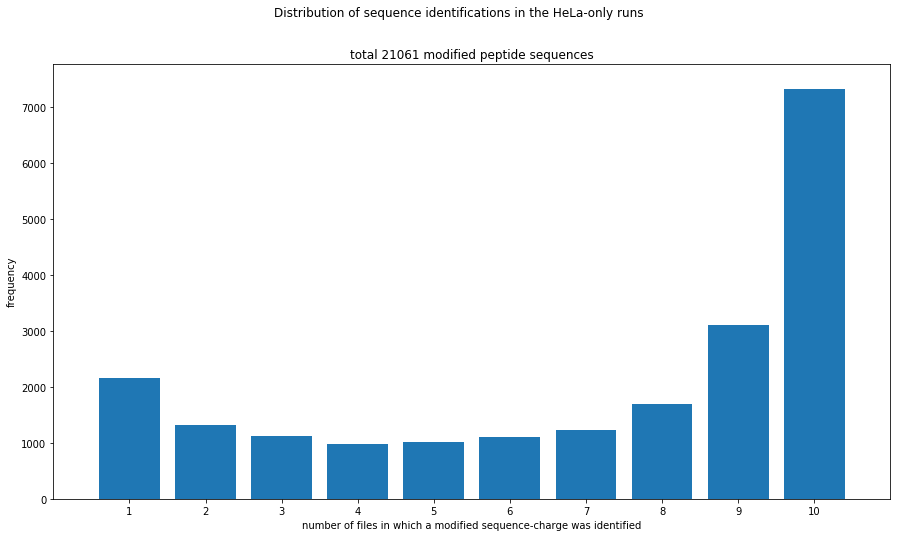

In [25]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.suptitle('Distribution of sequence identifications in the HeLa-only runs')
plt.title('total {} modified peptide sequences'.format(modified_sequences_count))

counts = np.bincount(human_sequence_occurences_df.number_of_runs_targets_extracted)
ax1.bar(range(11), counts, width=0.8, align='center')
plt.xlabel('number of files in which a modified sequence-charge was identified')
plt.ylabel('frequency')
ax1.set(xticks=range(1,11), xlim=[0, 11])
# plt.ylim((0,20000))

plt.show()